In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')
file.head()

<ipython-input-2-6c929c206b94>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')


id   item_date quantity tons    customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   

   country status item type  application  thickness   width  \
0     28.0    Won         W         10.0       2.00  1500.0   
1     25.0    Won         W         41.0       0.80  1210.0   
2     30.0    Won        WI         28.0       0.38   952.0   
3     32.0    Won         S         59.0       2.30  1317.0   
4     28.0    Won         W         10.0       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778     20210701.0   
1  0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                  S0380700       628377     20210101.0   
3                   DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                           2_S275JR+AR-CL1       640665     20210301.0   

   selling_price  
0         854.00  
1        1047.00  
2         644.33  
3         768.00  
4         577.00

In [3]:
file['status'].replace('nan', np.nan, inplace=True)
file.dropna(subset=['status'], inplace=True)
drop_values = ['To be approved', 'Draft', 'Wonderful', 'Not lost for AM', 'Revised', 'Offered', 'Offerable']
file['status'] = file['status'].astype('str')
file = file[~file['status'].apply(lambda x: any(x.startswith(value) for value in drop_values))]

In [6]:
del file['id']
del file['item type']
del file['material_ref']
del file['item_date']
del file['delivery date']
file['thickness'] = file['thickness'].fillna(file['thickness'].median())
file['selling_price'] = file['selling_price'].fillna(file['selling_price'].median())
file['application'] = file['application'].fillna(file['application'].mode()[0])
file['country'] = file['country'].fillna(file['country'].mode()[0])
file['status'] = file['status'].fillna(file['status'].mode()[0])
file['customer'] = file['customer'].fillna(file['customer'].mode()[0])
file['quantity tons'] = pd.to_numeric(file['quantity tons'], errors='coerce')
file.loc[file['quantity tons'].isnull(), 'quantity tons'] = file['quantity tons'].median()

In [7]:
file.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [8]:
df = file.drop_duplicates()
df.shape

(150448, 9)

In [9]:
file.dtypes

quantity tons    float64
customer         float64
country          float64
status            object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
dtype: object

In [10]:
for feature in ['quantity tons','application','thickness','width','product_ref','country','customer']:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

    print(f"Feature - {feature}")

    if df[feature].dtype != 'object':
        iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
        upper_threshold = df[feature].quantile(0.75) + (1.5 * iqr)
        lower_threshold = df[feature].quantile(0.25) - (1.5 * iqr)
        print(f"UpperThreshold - {upper_threshold} and lowerThreshold - {lower_threshold}")
        df[feature] = df[feature].clip(lower_threshold, upper_threshold)
        print(df[feature].describe())


Feature - quantity tons
UpperThreshold - 146.12014136750003 and lowerThreshold - -70.5537317525
count    150448.000000
mean         47.844464
std          46.476224
min         -70.553732
25%          10.698971
50%          29.934641
75%          64.867439
max         146.120141
Name: quantity tons, dtype: float64
Feature - application
UpperThreshold - 87.5 and lowerThreshold - -36.5
count    150448.000000
mean         25.186244
std          17.607181
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          87.500000
Name: application, dtype: float64
Feature - thickness
UpperThreshold - 6.39 and lowerThreshold - -2.6499999999999995
count    150448.000000
mean          2.282683
std           1.890207
min           0.180000
25%           0.740000
50%           1.500000
75%           3.000000
max           6.390000
Name: thickness, dtype: float64
Feature - width
UpperThreshold - 1986.0 and lowerThreshold - 690.0
count    150448.000000
mean  

###skewness###

quantity tons
1.1043144705693657


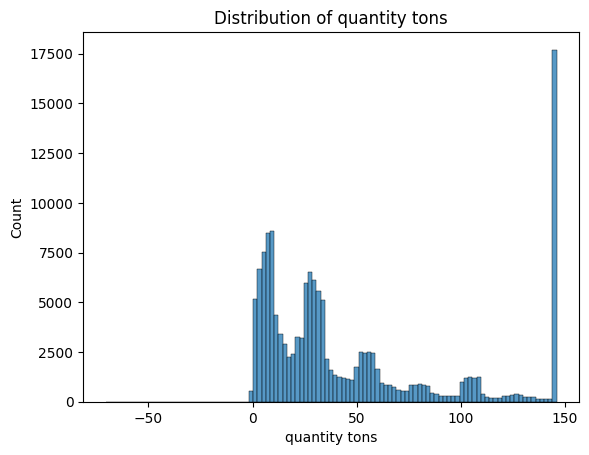

application
0.734878515240192


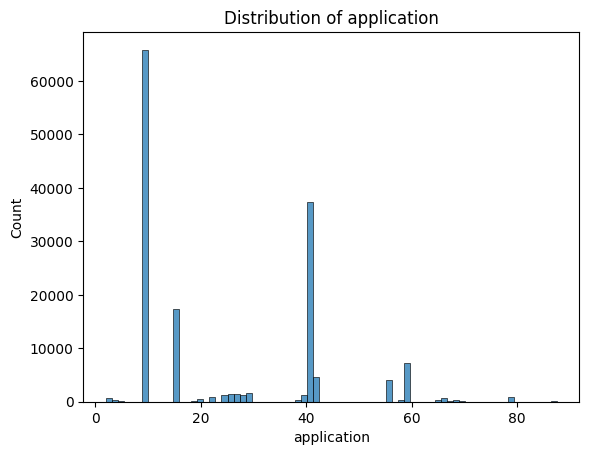

thickness
1.013505870444135


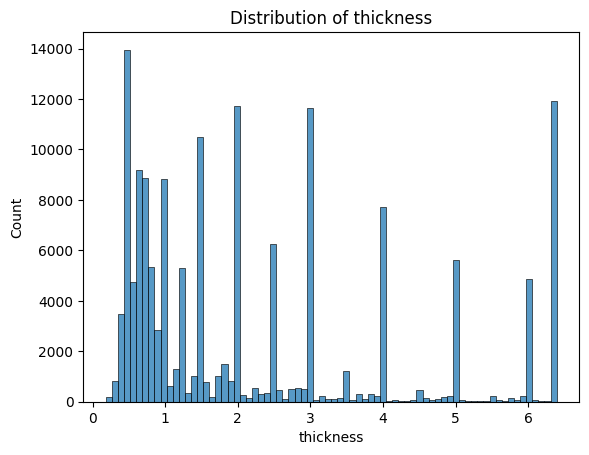

width
0.6579541028834889


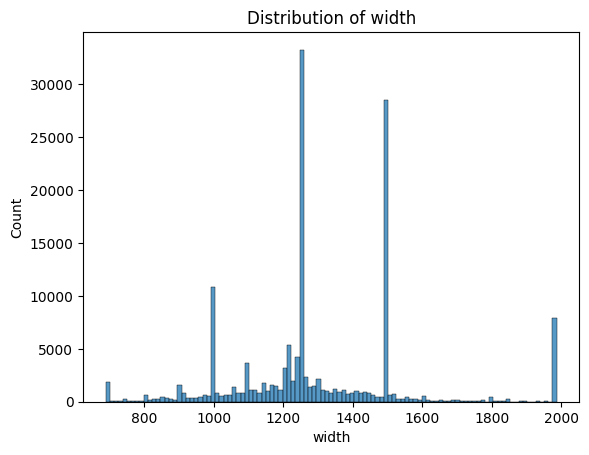

product_ref
1.013449706820693


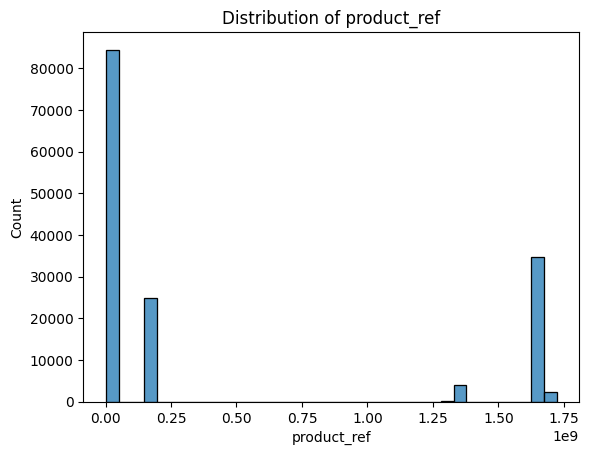

country
0.7082416400365593


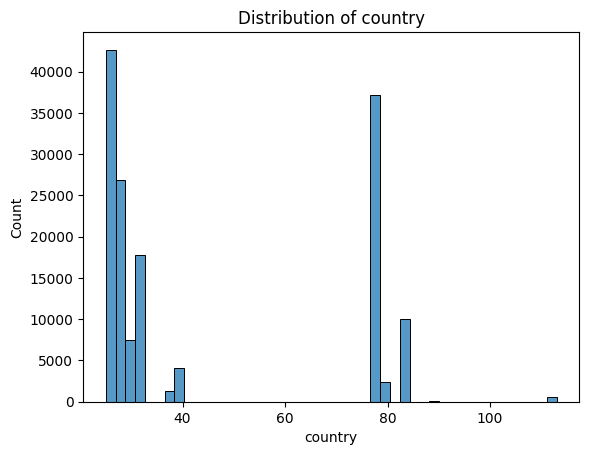

customer
0.9113460513113949


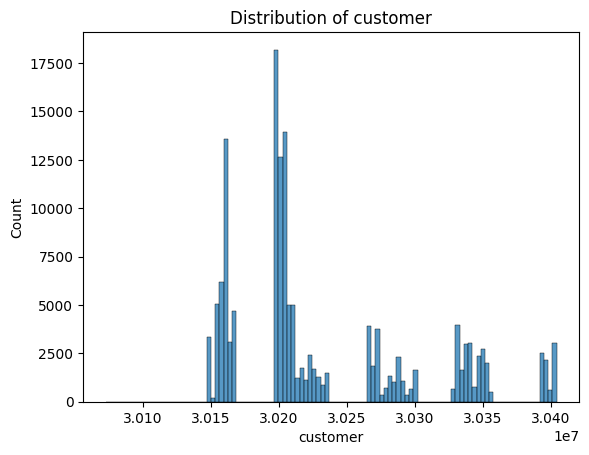

selling_price
141.32730732544331


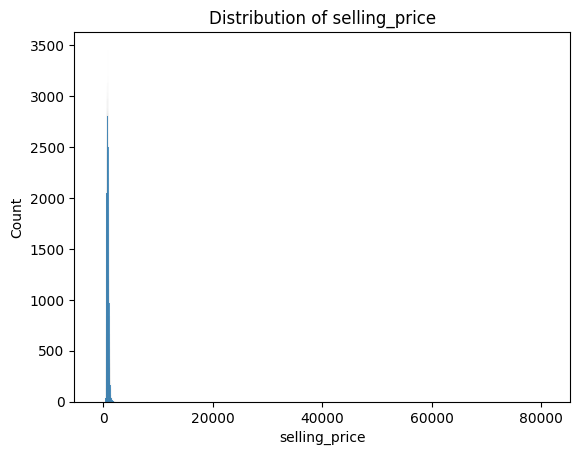

In [11]:
from scipy.stats import skew
columnames = ['quantity tons','application','thickness','width','product_ref','country','customer','selling_price']
for col in columnames:
    print(col)
    non_nan_values = df[col].dropna()
    print(skew(non_nan_values))

    plt.figure()
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

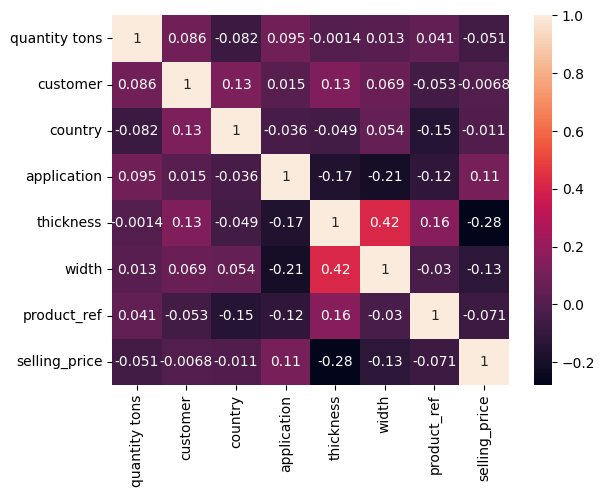

In [12]:
df_numeric = df.drop('status', axis=1)
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


In [13]:
colum = np.log(file[[ 'application', 'thickness', 'product_ref', 'country']])
skew(colum)

array([0.23368893, 0.32950823, 0.36839631, 0.6137585 ])

###EDA###

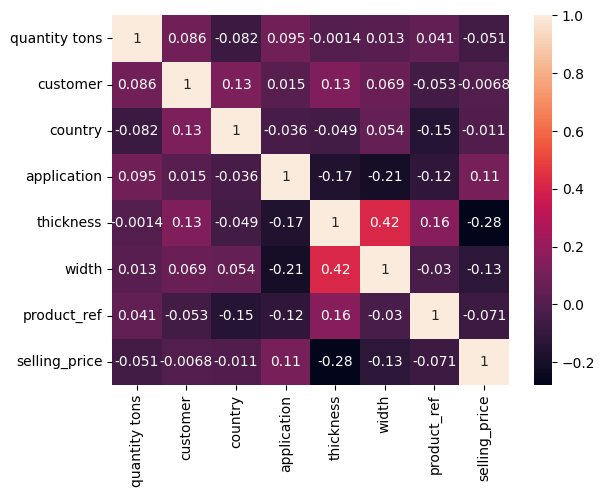

In [14]:
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

# linear relationship in the data - No
# we are going to transformations
# no transformations gave a linear relationship

###logistic EDA###

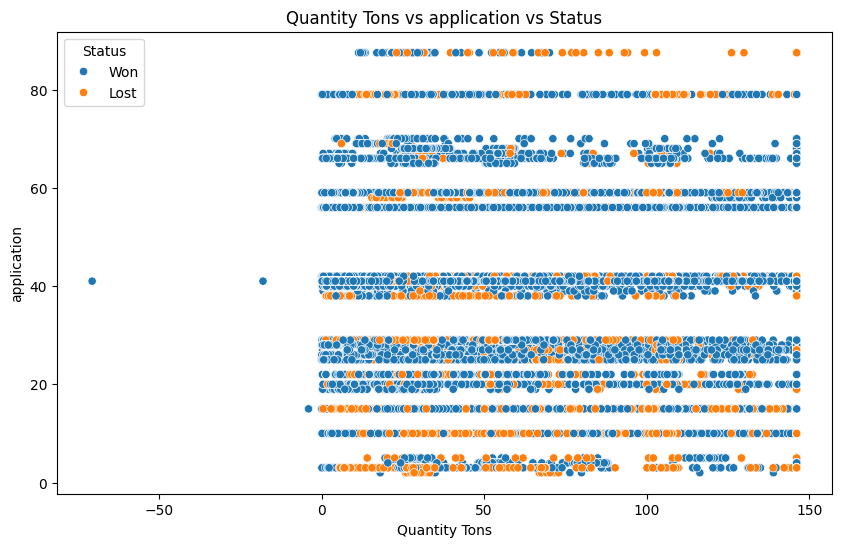

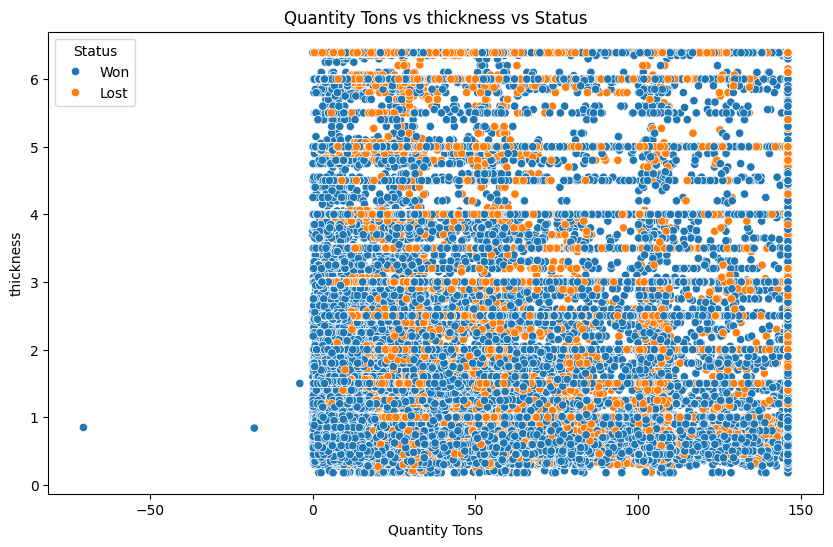

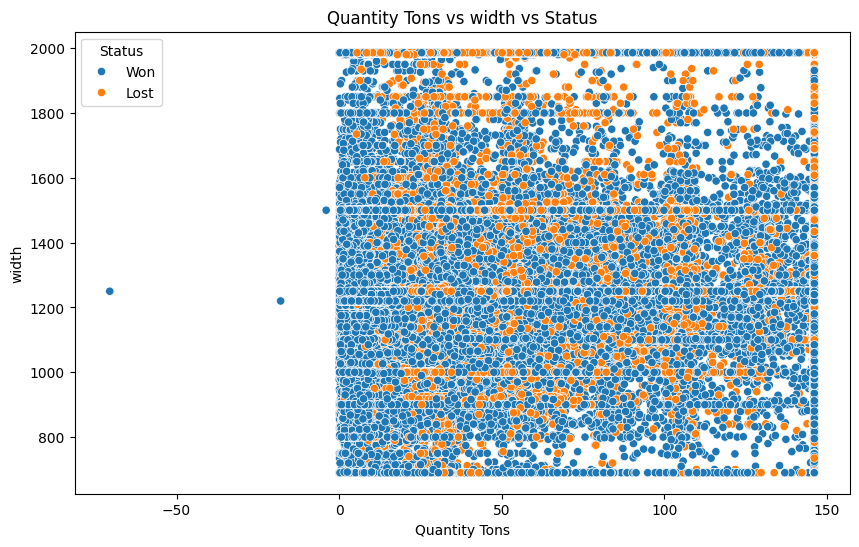

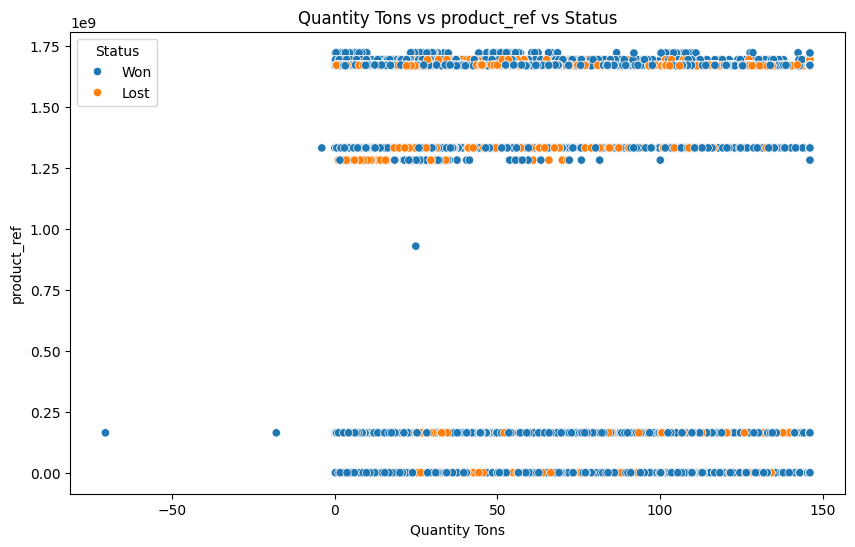

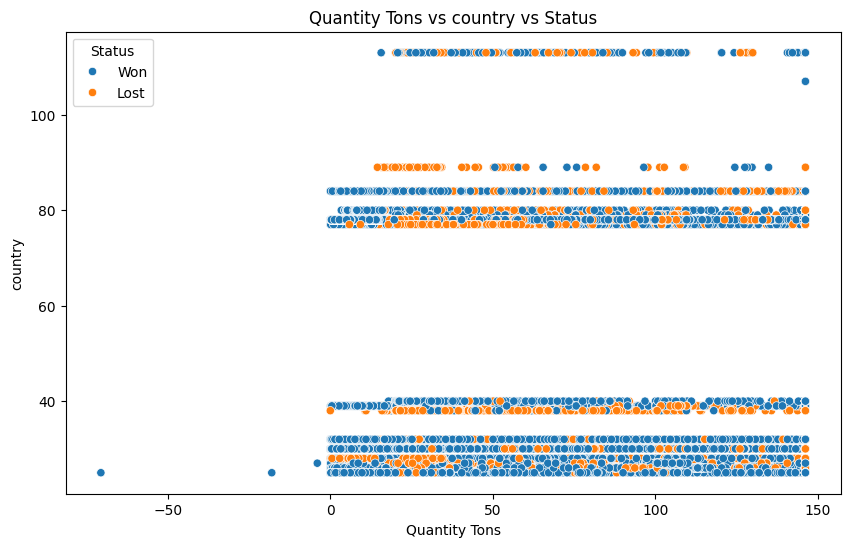

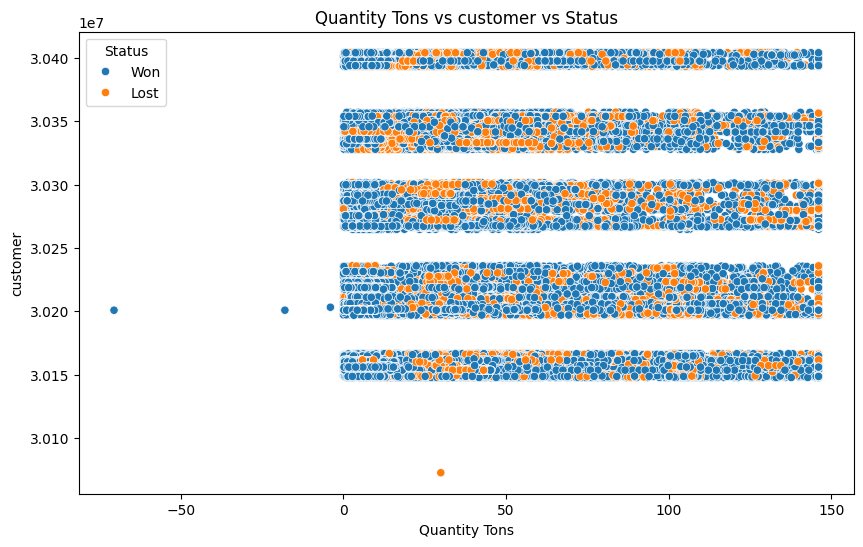

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


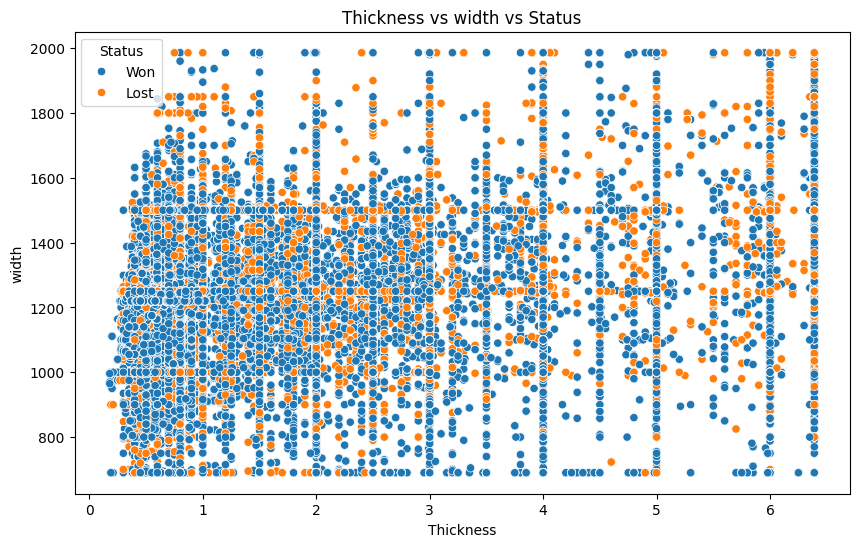

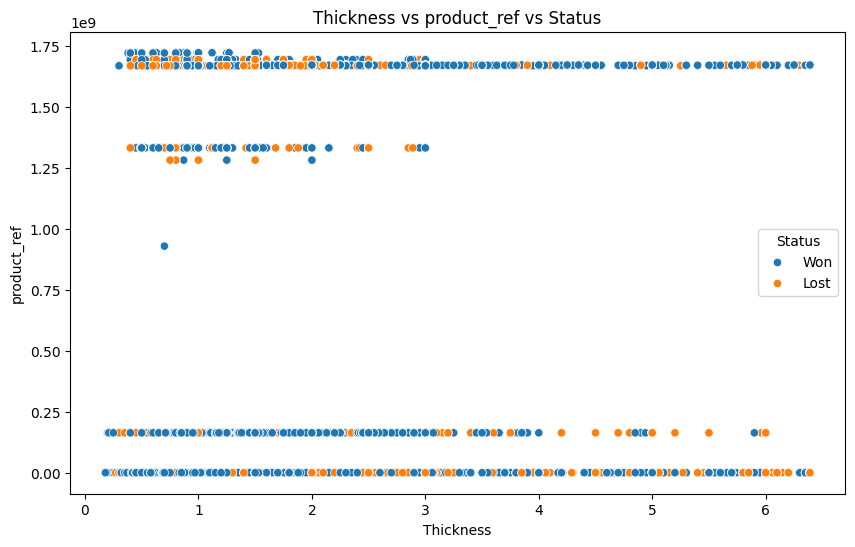

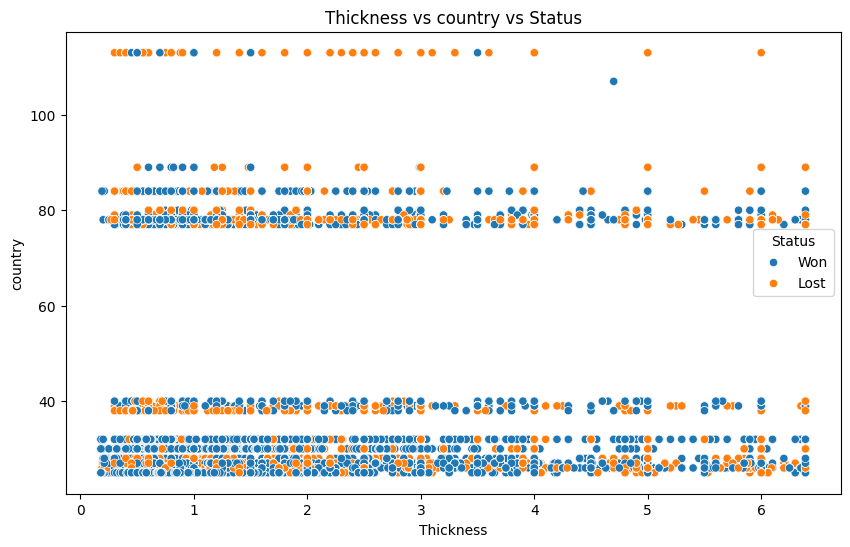

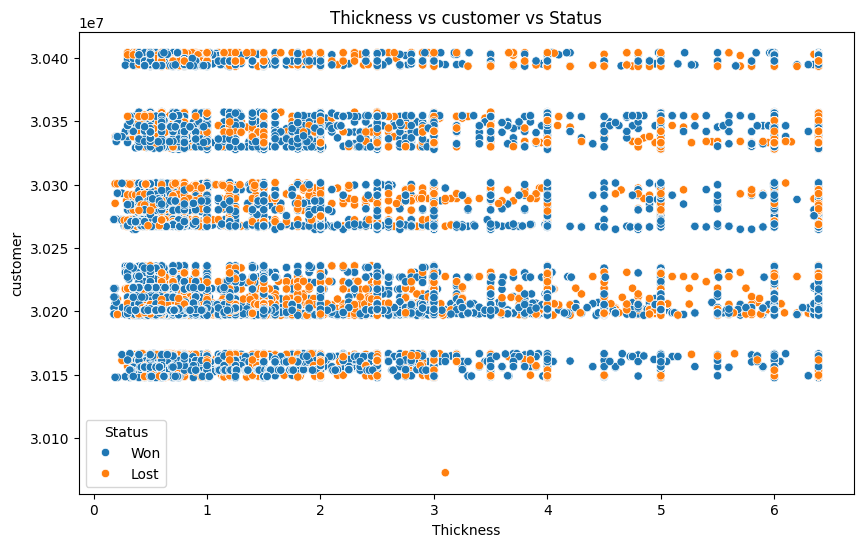

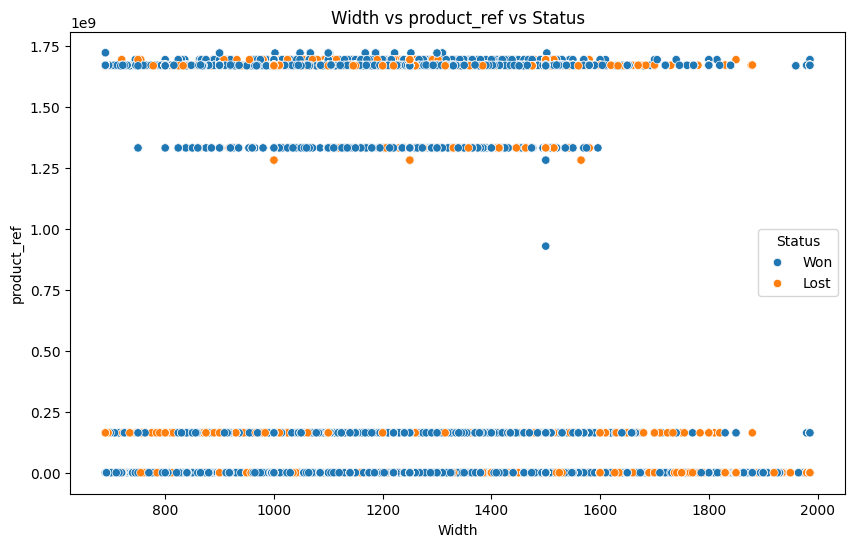

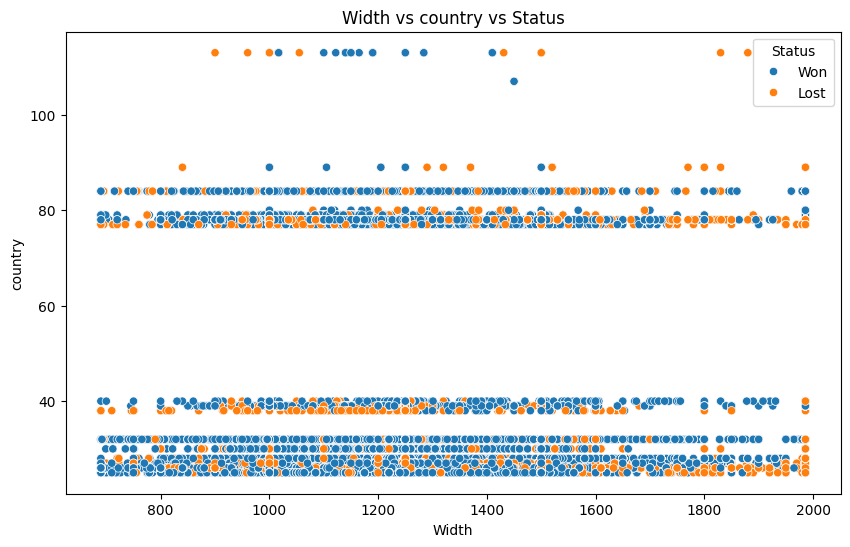

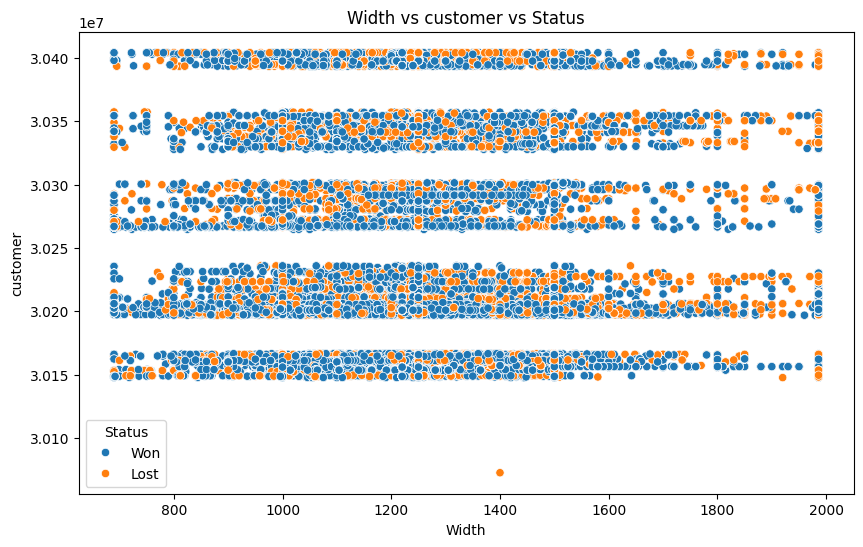

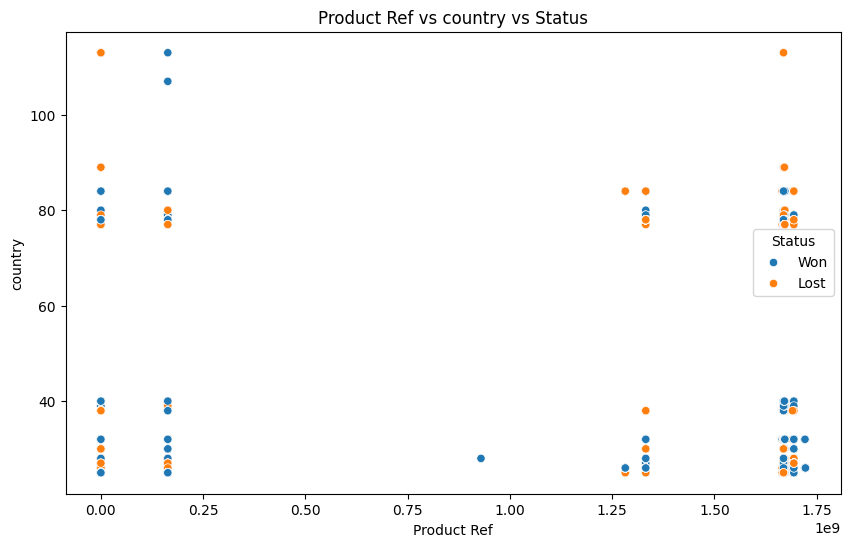

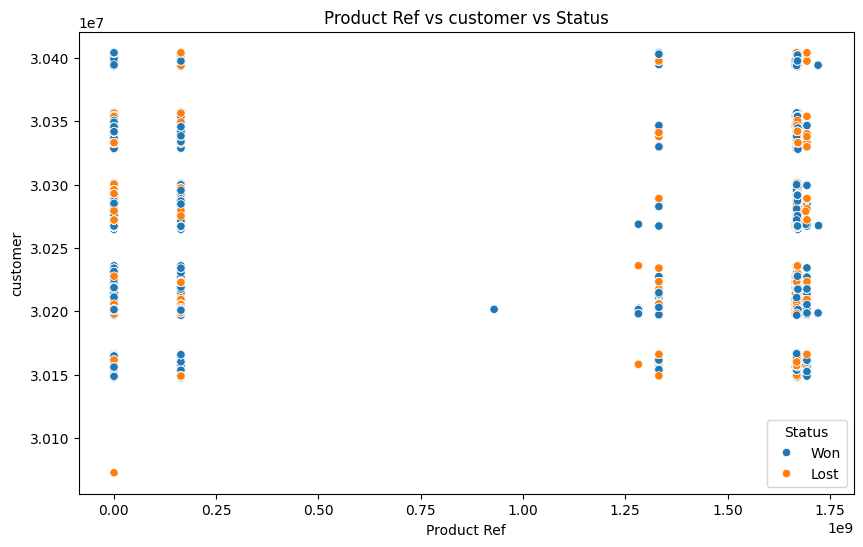

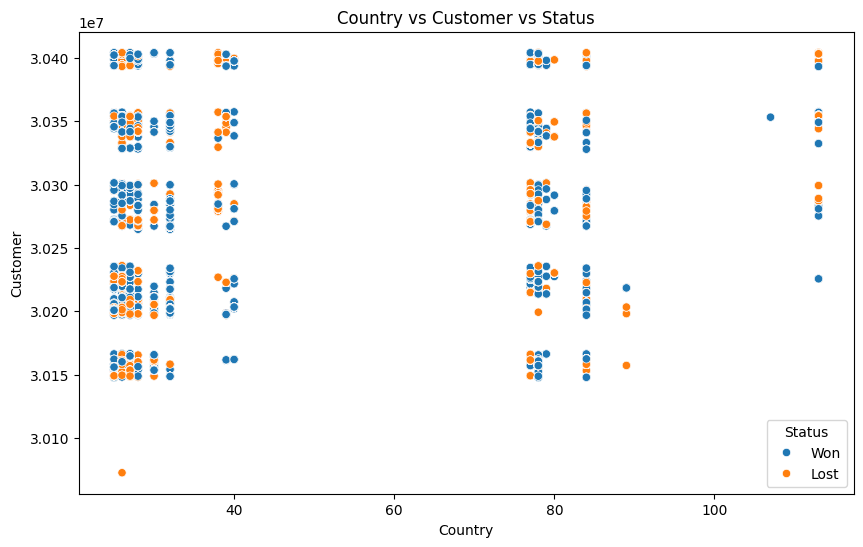

In [15]:
column_names_1 = ['application', 'thickness', 'width', 'product_ref', 'country', 'customer']
column_names_2 = ['width', 'product_ref', 'country', 'customer']
column_names_3 = ['product_ref', 'country', 'customer']
column_names_4 = ['country', 'customer']


for col in column_names_1:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='quantity tons', y=col, hue='status', data=df)
    plt.title(f"Quantity Tons vs {col} vs Status")
    plt.xlabel("Quantity Tons")
    plt.ylabel(col)
    plt.legend(title='Status')
    plt.show()


for col in column_names_2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='thickness', y=col, hue='status', data=df)
    plt.title(f"Thickness vs {col} vs Status")
    plt.xlabel("Thickness")
    plt.ylabel(col)
    plt.legend(title='Status')
    plt.show()

for col in column_names_3:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='width', y=col, hue='status', data=df)
    plt.title(f"Width vs {col} vs Status")
    plt.xlabel("Width")
    plt.ylabel(col)
    plt.legend(title='Status')
    plt.show()

for col in column_names_4:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='product_ref', y=col, hue='status', data=df)
    plt.title(f"Product Ref vs {col} vs Status")
    plt.xlabel("Product Ref")
    plt.ylabel(col)
    plt.legend(title='Status')
    plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='country', y='customer', hue='status', data=df)
plt.title("Country vs Customer vs Status")
plt.xlabel("Country")
plt.ylabel("Customer")
plt.legend(title='Status')
plt.show()

###There is no linear dicision boundaries###

ENCODING FOR CATEGORICAL DATA

In [16]:
# NO CATEGORICAL DATA

SPLIT FOR REGRESSION

In [17]:
from sklearn.model_selection import train_test_split

X = file[['quantity tons','application','thickness','width','product_ref','country','customer']]
y = file['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112836, 7), (37612, 7), (112836,), (37612,))

# SCALING IS NOT MANDATORY FOR BOTH LINEAR AND LOGISTIC\

###MODEL FOR LINEAR REGRESSION###

In [18]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.02954390101635873

####Control for overfitting/underfitting

In [19]:
from sklearn.model_selection import cross_val_score

for depth in [11,12,13,14,15,16,17,18,19,20]:
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 11, TrainScore: 0.5320008449822708, Cross-ValScore: 0.4828130146208478
Depth - 12, TrainScore: 0.5696517351303068, Cross-ValScore: 0.5031904537301903
Depth - 13, TrainScore: 0.5979489190487715, Cross-ValScore: 0.5096027781219437
Depth - 14, TrainScore: 0.6493163099153982, Cross-ValScore: 0.4683369464879997
Depth - 15, TrainScore: 0.6806580496314718, Cross-ValScore: 0.4258230914041413
Depth - 16, TrainScore: 0.7201857221472113, Cross-ValScore: 0.43352974776681785
Depth - 17, TrainScore: 0.751091458635453, Cross-ValScore: 0.44842033768278056
Depth - 18, TrainScore: 0.7809595284464792, Cross-ValScore: 0.45202270090395447
Depth - 19, TrainScore: 0.8092790605025875, Cross-ValScore: 0.434967023137759
Depth - 20, TrainScore: 0.8361313688996626, Cross-ValScore: 0.39340308407199565


In [20]:
model = DecisionTreeRegressor(max_depth = 12)

model.fit(X_train, y_train)

print(f"R2 score : {model.score(X_test, y_test)}")

R2 score : 0.0912863729697404


MODEL FOR LOGISTIC REGRESSION

In [21]:
file.status.value_counts() / file.shape[0]*100

status
Won     77.109699
Lost    22.890301
Name: count, dtype: float64

###Without balancing - lets fit the model (F1 Score)###

###split###

In [22]:
from sklearn.model_selection import train_test_split
file['status'] = file['status'].astype('category')
Xlo = file[['quantity tons', 'application', 'thickness', 'width', 'product_ref', 'country', 'customer']]
ylo = file['status']

Xlo_train, Xlo_test, ylo_train, ylo_test = train_test_split(Xlo, ylo, test_size=0.25, random_state=8)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
model = DecisionTreeClassifier()

model.fit(Xlo_train, ylo_train)
model.score(Xlo_test, ylo_test)

f1_score(ylo_test, model.predict(Xlo_test), pos_label = 'Won'), model.score(Xlo_test, ylo_test)

(0.9227589770085249, 0.880756141656918)

###IMBLEARN - SMOTE + ENN (OverSampling + Undersampling)###

In [24]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(Xlo_train, ylo_train)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(ylo_test, model.predict(Xlo_test), pos_label = 'Won')

0.9109964527571752